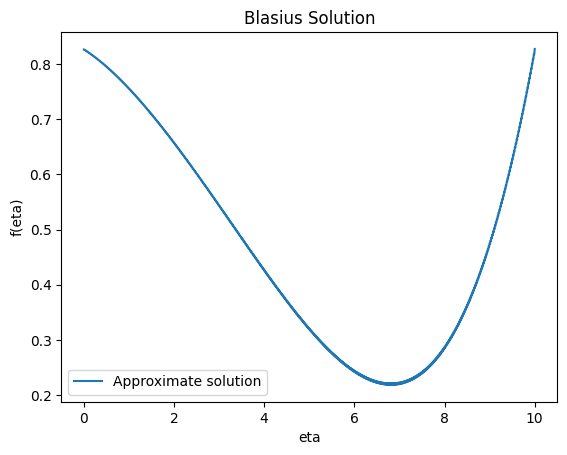

In [5]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

N = 1000  # Number of grid points
x = np.linspace(0, 10, N)  # Domain from 0 to 1
dx = x[1] - x[0]
f = x # inital guess for f

# boundary conditions
f0 = 0
f0_prime = 0
finfty_prime = 1

def derivatives(f, dx):
  f_prime = (np.roll(f, -1) - np.roll(f, 1)) / (2 * dx)
  f_double_prime = (np.roll(f, -1) - 2 * f + np.roll(f, 1)) / dx**2
  f_triple_prime = (np.roll(f, -2) - 2 * np.roll(f, -1) + 2 * np.roll(f, 1) - np.roll(f, 2)) / (2 * dx**3)
  return f_prime, f_double_prime, f_triple_prime

def system(f):
  f_prime, f_double_prime, f_triple_prime = derivatives(f, dx)
  residual = 2 * f_triple_prime + f * f_double_prime
  # boundary conditions
  residual[0] = f[0] - f0
  residual[0] = ((f[1] - f[0])/dx) - f0_prime
  residual[-1] = ((f[-1] - f[-2])/dx) - finfty_prime
  return residual

solution = opt.fsolve(system, f) # ,xtol=1e-8) 

plt.plot(x, solution, label='Approximate solution')
plt.title('Blasius Solution')
plt.xlabel('eta')
plt.ylabel('f(eta)')
plt.legend()
plt.show()
